In [1]:
import pickle

from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_results(path):
    with open(path, 'rb') as f:
        style_results, song_style_results, chroma_results, _ = pickle.load(f)

    df = pd.concat([chroma_results.groupby('name').mean(), style_results.groupby('name').mean(), song_style_results.groupby('name').mean()], axis=1, sort=True)
    df_err = song_style_results.groupby('name').std()
    df = df.rename(columns={'chroma_sim': 'content', 'style_sim': 'macro-style', 'song_style_sim': 'song-style'})
    df_err = df_err.rename(columns={'chroma_sim': 'content', 'style_sim': 'macro-style', 'song_style_sim': 'song-style'})
    return df, df_err

,content,macro-style,song-style
name,,,
bass2bass_seq2seq,0.611128,0.924306,0.804898
bass2bass_roll2seq,0.632196,0.935333,0.820797
all2bass,0.634791,0.931728,0.824284
source,1.000000,0.661065,0.415065


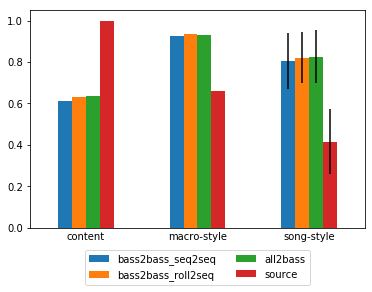

In [3]:
df, df_err = load_results('results/test_bass.pickle')
df = df.reindex(['bass2bass_seq2seq', 'bass2bass_roll2seq', 'all2bass', 'source'])
display(df)
df.T.plot.bar(rot=0, yerr=df_err.T)
plt.gca().tick_params(axis=u'x', which=u'both', length=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2)
plt.show()

,content,macro-style,song-style
name,,,
piano2piano,0.608263,0.952518,0.886366
all2piano,0.600990,0.943412,0.890773
source,1.000000,0.774304,0.583419


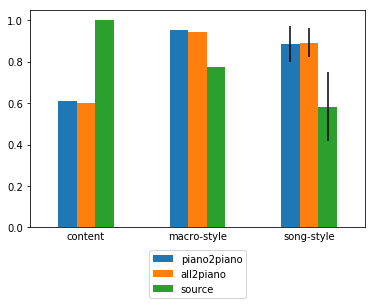

In [4]:
df, df_err = load_results('results/test_piano.pickle')
df = df.reindex(['piano2piano', 'all2piano', 'source'])
display(df)
df.T.plot.bar(rot=0, yerr=df_err.T)
plt.gca().tick_params(axis=u'x', which=u'both', length=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=1)
plt.show()